In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'I_V Sweep - Unit (transfer) [251203_ALD IGZO_#1_R0C0_40_20_1(1) _ 12_8_2025 9_25_29 AM].csv'
with open(file, 'r', encoding = 'utf-8') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if any(col.strip().startswith('DataValue') for col in line.split(',')):
        skip_row = i - 1
        break

df = pd.read_csv(file, sep = ',', skiprows = skip_row)
df.columns = df.columns.str.strip()
df = df.loc[:,'VG':'ICH']

In [34]:
for i in df.columns:
    empty = df[i].isna().sum()
    print(f'{i} column의 결측값 갯수는 {empty}')

df.describe()

VG column의 결측값 갯수는 0
VD column의 결측값 갯수는 0
VS column의 결측값 갯수는 0
IG column의 결측값 갯수는 0
ID column의 결측값 갯수는 0
IS column의 결측값 갯수는 0
SS column의 결측값 갯수는 0
ICH column의 결측값 갯수는 0


,VG,VD,VS,IG,ID,IS,ICH
count,363.000000,363.000000,363.0,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02
mean,0.000000,1.500000,0.0,-8.982920e-14,3.160482e-06,-3.159410e-06,3.160482e-06
std,1.748835,1.144673,0.0,4.231941e-14,6.898611e-06,6.896477e-06,6.898611e-06
min,-3.000000,0.100000,0.0,-6.690000e-13,-9.100000e-14,-3.386370e-05,-2.220000e-13
25%,-1.500000,0.100000,0.0,-1.050000e-13,-2.200000e-14,-1.938445e-06,-1.185000e-13
50%,0.000000,1.500000,0.0,-8.800000e-14,3.553000e-12,-3.717000e-12,3.493000e-12
75%,1.500000,2.900000,0.0,-6.950000e-14,1.938950e-06,-1.635000e-13,1.938950e-06
max,3.000000,2.900000,0.0,2.500000e-14,3.387210e-05,-8.300000e-14,3.387210e-05


Text(0.5, 1.0, 'Transfer Curve')

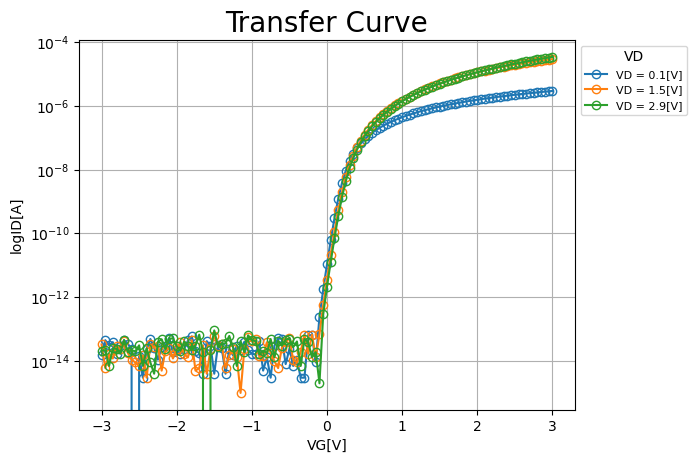

In [35]:
df['ID'] = df['ID'].abs()
fig, ax  = plt.subplots()
g = df.groupby('VD')

for i, group in g:
    plt.semilogy(group['VG'],group['ID'],marker = 'o', markerfacecolor = 'none', markersize = 6,label = f'VD = {i}[V]')

ax.set_xlabel('VG[V]')
ax.set_ylabel('logID[A]')
ax.legend(title = 'VD', bbox_to_anchor = (1,1), fontsize =  8)
ax.grid(True)
ax.set_title('Transfer Curve', fontsize = 20)

In [51]:
target = -10
df['logid'] = np.log10(df['ID'])
gg = df.groupby('VD')

for vd, value in gg:
    value = value.sort_values('VG')
    logid = value['logid'].to_numpy()       # logid 컬럼의 숫자 리스트 생성
    vg = value['VG'].to_numpy()             # VG 컬럼의 숫자 리스트 생성
    logid = np.clip(logid,-300,None)

    diff = logid - target
    cross_target_point = np.where(diff[:-1]*diff[1:] <= 0)[0]

    x1, x2 = vg[cross_target_point], vg[cross_target_point +1]
    y1, y2 = logid[cross_target_point], logid[cross_target_point+1]
    
    vth = (target - y1)*(x2 - x1)/(y2 - y1) + x1
    print(f'vd={vd}일때는 vth = {vth}')

    



vd=0.1일때는 vth = [0.06538497]
vd=1.5일때는 vth = [0.09603633]
vd=2.9일때는 vth = [0.11046893]


In [31]:
target1 = -10                               # log(ID) = -10이 타겟임(vth 산출용)
target2 = -9                                # SS 산출용
vth_by_vd_10 = {}  # VD별 Vth 저장
vth_by_vd_9 = {}  # VD별 Vth 저장
for vd, g in df.groupby('VD'):              # 앞에 있는 vd는 df.groupby('VD')의 key인 'VD'를 받는것이고 뒤에 있는 g는 key 'VD'에 해당하는 값을 받는다.
    g = g.sort_values('ID')

    VG = g['VG'].to_numpy()                 # VG column을 숫자로 변환
    ID = g['ID'].to_numpy()        
    absID = np.abs(ID)
    absID = np.clip(absID, 1e-300, None)   # underflow 방지
    logI = np.log10(absID)

     # ===== 3) target 교차 구간 탐색 + 선형 보간 =====
    diff1 = logI - target1
    diff2 = logI - target2
    cross_idx_10 = np.where(diff1[:-1] * diff1[1:] <= 0)[0]  # target을 사이에 두는 인접 점(★★★★★★★★★★★★ np.where(condition,True,False))
    cross_idx_9 = np.where(diff2[:-1] * diff2[1:] <= 0)[0] 

print(cross_idx_10)
 

[62]


In [58]:
list_sample = list()
print(list_sample)
if list_sample == []:
    print('0')
else:
    print('1')

[]
0
